In [1]:
import nasdaqdatalink as dl

In [2]:
SYMBOLS = ['AAPL','MMM','BA','CAT']
wiki_symbols = ['WIKI/%s' % symbol for symbol in SYMBOLS]
print(wiki_symbols)

['WIKI/AAPL', 'WIKI/MMM', 'WIKI/BA', 'WIKI/CAT']


In [3]:
df = dl.get(wiki_symbols,
           start_date='2017-01-01',
           end_date='2017-12-31',
           column_index=11)
df.columns = SYMBOLS
df.head()

,AAPL,MMM,BA,CAT
Date,,,,
2017-01-03,114.715378,174.831943,152.668443,91.258087
2017-01-04,114.586983,175.097063,154.273227,90.850294
2017-01-05,115.169696,174.498088,154.360760,90.296862
2017-01-06,116.453639,175.008690,154.740073,90.335699
2017-01-09,117.520300,174.066041,153.981448,89.685174


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-01-03 to 2017-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    249 non-null    float64
 1   MMM     223 non-null    float64
 2   BA      250 non-null    float64
 3   CAT     250 non-null    float64
dtypes: float64(4)
memory usage: 17.9 KB


In [5]:
df2 = dl.get('CHRIS/CME_GC1',
            column_index=6,
            collapse='monthly',
            start_date='2000-01-01')
df2.head()

,Settle
Date,
2000-01-31,283.2
2000-02-29,294.2
2000-03-31,278.4
2000-04-30,274.7
2000-05-31,271.7


In [6]:
import matplotlib as mlp
import matplotlib.pyplot as plt

In [7]:
df_settle = df2['Settle'].resample('MS').ffill().dropna()
df_rolling = df_settle.rolling(12)
df_mean = df_rolling.mean()
df_std = df_rolling.std()

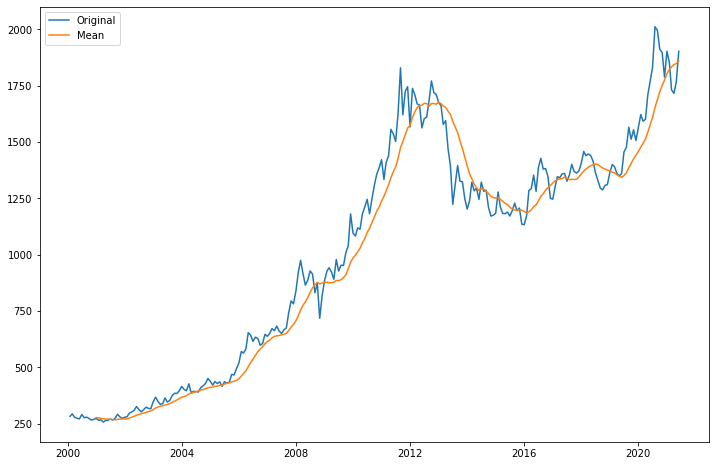

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(df_settle, label='Original')
plt.plot(df_mean, label='Mean')
plt.legend()